In [69]:
from scipy.io import loadmat
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import  cross_val_predict
from sklearn import metrics
import itertools

In [70]:
mnist_raw=loadmat("mnist-original.mat")

In [71]:
mnist = {"data":mnist_raw["data"].T,"target":mnist_raw["label"][0]}

In [72]:
print(mnist["data"].shape,mnist['target'].shape)

(70000, 784) (70000,)


In [73]:
# build attr x,y for easy to refference
x,y = mnist["data"],mnist["target"]

In [74]:
#train and test set
#1-60000 kepp in train set
#60001-70000 keep in test set
#class 0-9
x_train,x_test,y_train,y_test =  x[:60000],x[60000:],y[:60000],y[60000:]

In [75]:
print(x_train.shape,x_test.shape,y_train.shape,y_test.shape)

(60000, 784) (10000, 784) (60000,) (10000,)


In [76]:
#class 0 or not
#send one data -> model answer that true : false
#train data class 0 
y_train0 = (y_train==0)


In [77]:
#if y_train ==0 then y_train0 will return true
print(y_train,y_train0)

[0. 0. 0. ... 9. 9. 9.] [ True  True  True ... False False False]


In [78]:
#test data
y_test0 = (y_test ==0)
print(y_test,y_test0)

[0. 0. 0. ... 9. 9. 9.] [ True  True  True ... False False False]


In [79]:
#train class 0 by use SGD classifier
SGD_CLF = SGDClassifier()
SGD_CLF.fit(x_train,y_train0)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

In [80]:
def displayImage(x):
    plt.imshow(
    x.reshape(28,28),
    cmap=plt.cm.binary,
    interpolation="nearest")

In [81]:
#actual_y will tell what number is
def displaypredict(clf,actual_y,x) :
    print("Actual : ",actual_y)
    print("Prediction : ",clf.predict([x])[0])
    

Actual :  False
Prediction :  False


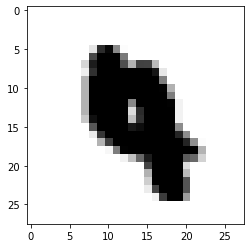

In [82]:
displayImage(x_test[5000])
displaypredict(SGD_CLF,y_test0[5000],x_test[5000])

Actual :  True
Prediction :  True


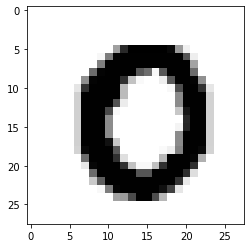

In [83]:
displayImage(x_test[500])
displaypredict(SGD_CLF,y_test0[500],x_test[500])

In [84]:
#train class 5
y_train5 = (y_train==5)
y_test5 = (y_test ==5)
SGD_CLF.fit(x_train,y_train5)

SGDClassifier(alpha=0.0001, average=False, class_weight=None,
              early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
              l1_ratio=0.15, learning_rate='optimal', loss='hinge',
              max_iter=1000, n_iter_no_change=5, n_jobs=None, penalty='l2',
              power_t=0.5, random_state=None, shuffle=True, tol=0.001,
              validation_fraction=0.1, verbose=0, warm_start=False)

Actual :  False
Prediction :  False


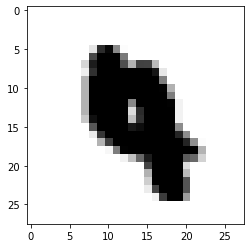

In [85]:
displayImage(x_test[5000])
displaypredict(SGD_CLF,y_test5[5000],x_test[5000])

Actual :  True
Prediction :  True


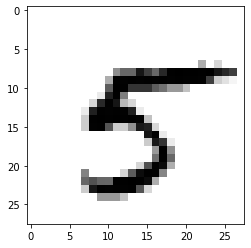

In [86]:
displayImage(x_test[5500])
displaypredict(SGD_CLF,y_test5[5500],x_test[5500])

In [87]:
# cv = จำนวนครั้งในการทดลอง(K) โดยจะได้ผลเป็นคะเนน
score = cross_val_score(SGD_CLF,x_train,y_train5,cv=3,scoring= "accuracy")
print(score)

[0.91665 0.88595 0.9138 ]


In [88]:
y_train_pred = cross_val_predict(SGD_CLF,x_train,y_train5,cv=3)
CM = confusion_matrix(y_train5,y_train_pred)
print(CM)

[[46560  8019]
 [  784  4637]]


In [89]:
def displayConfusionMatrix(cm,cmap=plt.cm.GnBu):
    classes=["Other Number","Number 5"]
    plt.imshow(cm,interpolation='nearest',cmap=cmap)
    plt.title("Confusion Matrix")
    plt.colorbar()
    trick_marks=np.arange(len(classes))
    plt.xticks(trick_marks,classes)
    plt.yticks(trick_marks,classes)
    thresh=cm.max()/2
    for i , j in itertools.product(range(cm.shape[0]),range(cm.shape[1])):
        plt.text(j,i,format(cm[i,j],'d'),
        horizontalalignment='center',
        color='white' if cm[i,j]>thresh else 'black')

    plt.tight_layout()
    plt.ylabel('Actually')
    plt.xlabel('Prediction')
    plt.show()

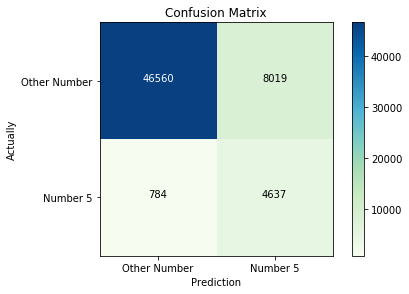

In [90]:
#วัดค่าโดยใช้ confusion matrix
plt.figure()
displayConfusionMatrix(CM)

In [91]:
tn,fp,fn,tp = confusion_matrix(y_train5,y_train_pred).ravel()

In [92]:
metrics.accuracy_score(y_train5,y_train_pred)

0.8532833333333333

In [93]:
metrics.precision_score(y_train5,y_train_pred)

0.3663874841972187

In [94]:
metrics.recall_score(y_train5,y_train_pred)

0.8553772366722007

In [95]:
metrics.f1_score(y_train5,y_train_pred)

0.5130276041378548

In [98]:
print(metrics.classification_report(y_train5,y_train_pred))

              precision    recall  f1-score   support

       False       0.98      0.85      0.91     54579
        True       0.37      0.86      0.51      5421

    accuracy                           0.85     60000
   macro avg       0.67      0.85      0.71     60000
weighted avg       0.93      0.85      0.88     60000

